In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X.shape, y.shape

((506, 13), (506,))

R^2 = 0.510
MSE = 40.050


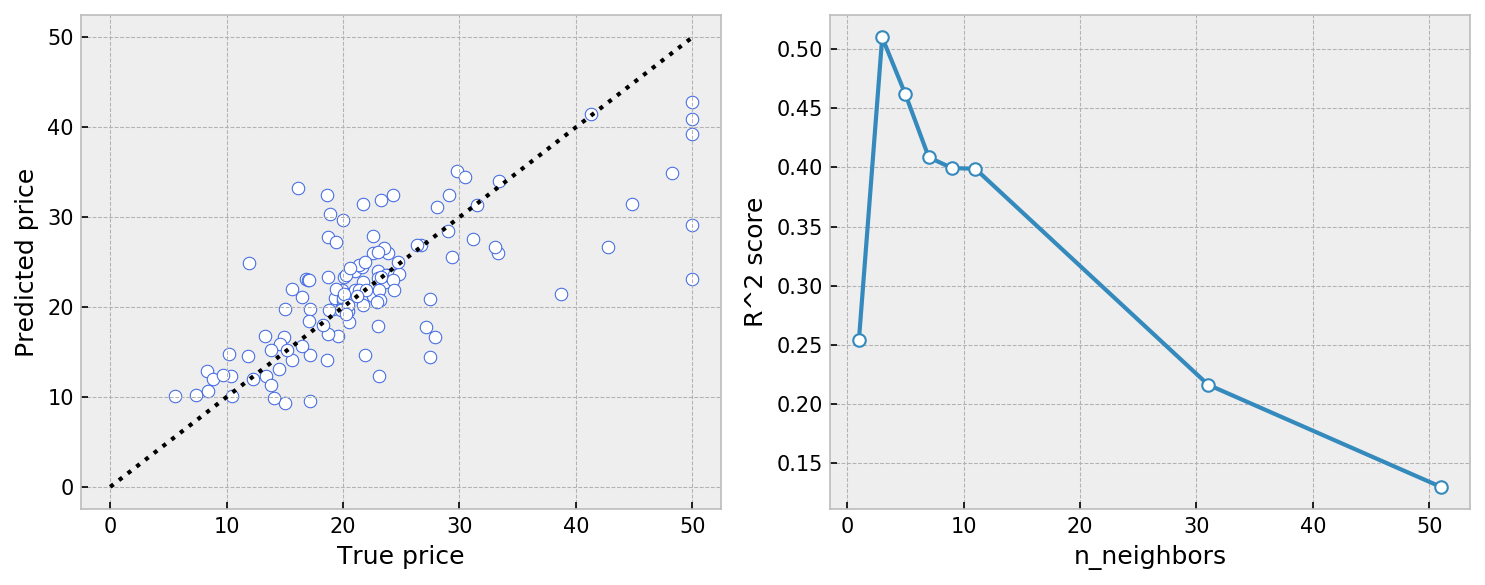

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"R^2 = {r2_score(y_test, y_pred):.3f}")
print(f"MSE = {mean_squared_error(y_test, y_pred):.3f}")

fig, ax = plt.subplots(1, 2, dpi=150, figsize=(10, 4))
ax[0].scatter(y_test, y_pred, c='white', edgecolor='royalblue')
ax[0].plot([0, 50], [0, 50], 'k:')
ax[0].set_xlabel('True price')
ax[0].set_ylabel('Predicted price')

r2_scores = []
n_neighbors = [1, 3, 5, 7, 9, 11, 31, 51]
for n_neighbor in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    
ax[1].plot(n_neighbors, r2_scores, marker='o', mfc='w')
ax[1].set_xlabel('n_neighbors')
ax[1].set_ylabel('R^2 score')
plt.tight_layout()